# Superdense Coding
This is the process via which two classical bits can be exchanged between two parties using a _single messenger_ qubit, and overall two qubits. The concept of entanglement is key here.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

Our inital condition is this - the two parties share an entangled pair of qubits, which exists in the bell state $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$. We begin by creating this state

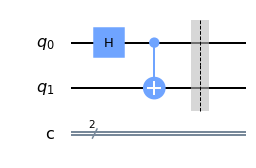

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.draw('mpl')

In this example, we let the to-be-sent bit string be $01$

In [4]:
b = input('Enter the two bit string: ')

Enter the two bit string: 01


Now, the first party performs an operation on their qubit with reference to what message is to be sent.

| Message | Gate |
| ------- | ---- |
| 00 | $I$ |
| 01 | $X$ |
| 10 | $Z$ |
| 11 | $ZX$ |

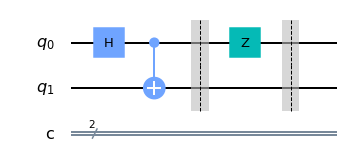

In [5]:
if(b == '00'):
    pass
elif(b == '10'):
    qc.x(0)
elif(b == '01'):
    qc.z(0)
elif(b == '11'):
    qc.z(0)
    qc.x(0)
else:
    print("Invalid Bitstring")
qc.barrier()
qc.draw('mpl')

Now, the qubit with the first party is _sent_ to the second party. Further, the second party has no knowledge of the state of the first qubit. All it does is perform a certain operation - CNOT(0,1) on the qubits, which, after measurement gives the answer! This is precisely what the algorithm ensures.

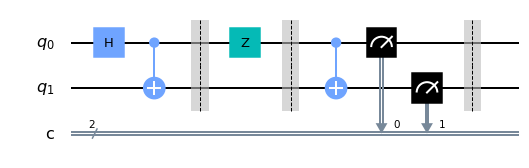

In [6]:
qc.cx(0,1)
for i in range(2):
    qc.measure(i,i)
qc.barrier()
qc.draw('mpl')

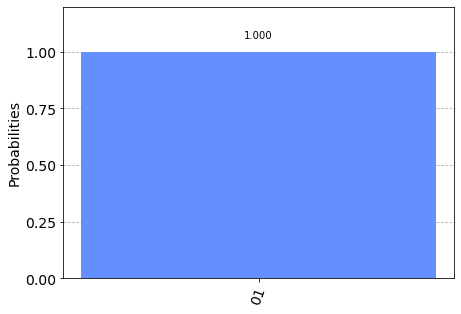

In [7]:
sim = Aer.get_backend('qasm_simulator')
job = execute(qc,sim,shots=1)
result = job.result()
count = result.get_counts()

plot_histogram(count)

And there ya go! We measure our qubits to be in the state $|01\rangle$, and thus the bit string that had to be sent is (was?) $01$